In [32]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [38]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [39]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [40]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [41]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [42]:
import matplotlib.pyplot as plt

## Sepal length vs Sepal Width (Setosa vs Versicolor)

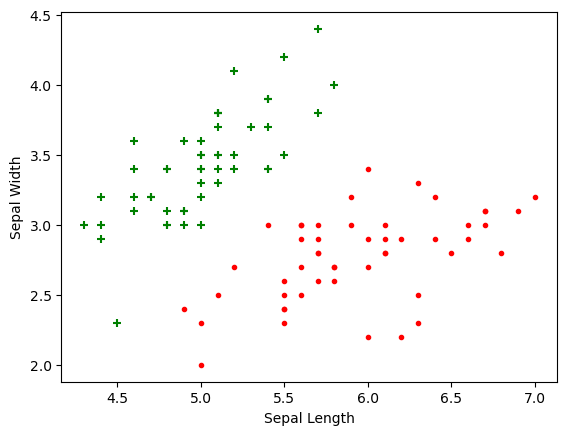

In [43]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color = "green", marker = "+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color = "red", marker = ".")

## Petal length vs Pepal Width (Setosa vs Versicolor)

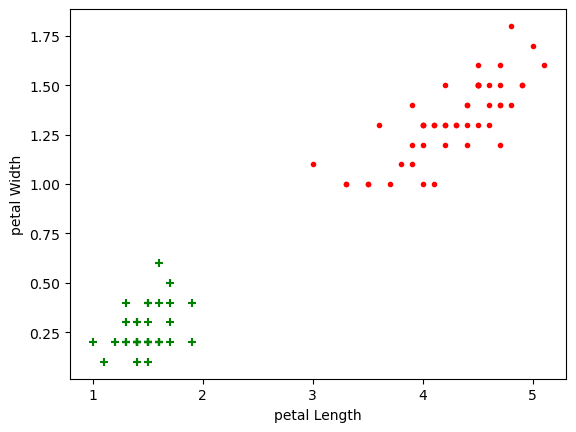

In [44]:
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color = "green", marker = "+")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color = "red", marker = ".")

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x = df.drop(['target', 'flower_name'], axis = 'columns')

In [47]:
y = df.target

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [49]:
x_train.shape

(120, 4)

In [50]:
x_test.shape

(30, 4)

# <font color = "green">KNN (K Neighrest Neighbour Classifier)</font>

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier(n_neighbors = 35)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [64]:
knn.score(x_test, y_test)

0.9666666666666667

## Plot Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

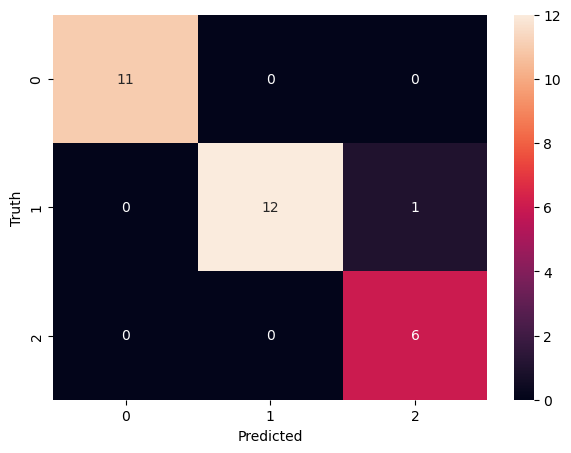

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Print classification report for precesion, recall and f1-score for each classes



In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

